In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline


In [75]:
# genearting dataset
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
                            #  adding some noise to each data point in y. 
# y = 0.8x^2 + 0.9x + 2

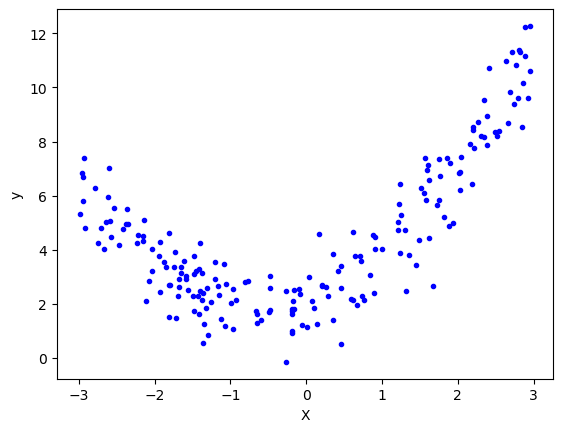

In [78]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [79]:
np.random.rand(200,1)

array([[0.62844616],
       [0.32410536],
       [0.26913276],
       [0.77678428],
       [0.14284723],
       [0.51616567],
       [0.88273626],
       [0.72761855],
       [0.69556479],
       [0.59719236],
       [0.80807904],
       [0.78120955],
       [0.18693686],
       [0.86780818],
       [0.46292274],
       [0.49012655],
       [0.82294269],
       [0.44184229],
       [0.95447119],
       [0.37918838],
       [0.5211159 ],
       [0.25688778],
       [0.73898396],
       [0.53321882],
       [0.47189296],
       [0.11350916],
       [0.42871151],
       [0.84246815],
       [0.59895484],
       [0.68354056],
       [0.92799016],
       [0.03573432],
       [0.47539224],
       [0.33530937],
       [0.31454092],
       [0.7824695 ],
       [0.14757996],
       [0.04251877],
       [0.94088558],
       [0.81174254],
       [0.01441655],
       [0.23099725],
       [0.05736491],
       [0.84885139],
       [0.04201007],
       [0.03728333],
       [0.57121737],
       [0.042

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.33967985686856217

Text(0, 0.5, 'y')

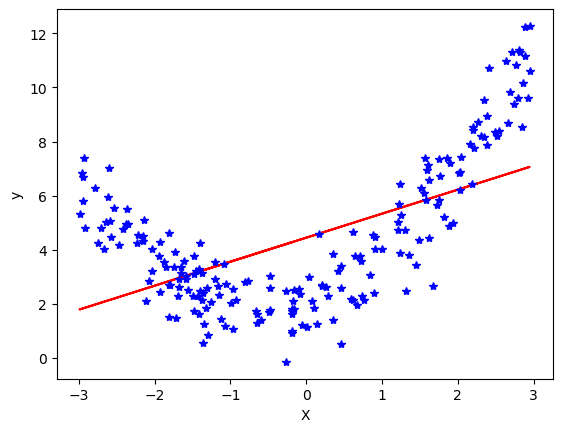

In [83]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,"b*") 
plt.xlabel("X")
plt.ylabel("y")

In [84]:
poly = PolynomialFeatures(degree=2,include_bias=True) # include bias gives beta 0. 

X_train_trf = poly.fit_transform(X_train)
X_test_trf = poly.transform(X_test)

In [85]:
print(X_train[0])
print(X_train_trf[0])

[-1.41201471]
[ 1.         -1.41201471  1.99378554]


In [86]:
# above output gives the values of x^0,x^1,x^2

In [87]:
lr = LinearRegression()
lr.fit(X_train_trf,y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(X_test_trf)

In [89]:
r2_score(y_test,y_pred)

0.8924808781854479

In [ ]:
print(lr.coef_)
print(lr.intercept_)

#  y = 0 + 0.83x + 0.745x^2 + 2.15
#  y = 0.745x^2 + 0.83x + 2.15

# slight difference is due to the noise that we added.

[[0.         0.83883231 0.74520005]]
[2.15352622]


In [ ]:
# y = 0.8x^2 + 0.9x + 2

In [ ]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

In [ ]:
# We are:

# Creating 200 evenly spaced points between -3 and +3 → much denser and smoother than scattered X_train or X_test.

# Applying the same polynomial transformation to them.

# Getting predictions over a smooth, continuous range of X values.

# This allows us to plot the predicted curve of the model, not just predictions at sparse X_test points.

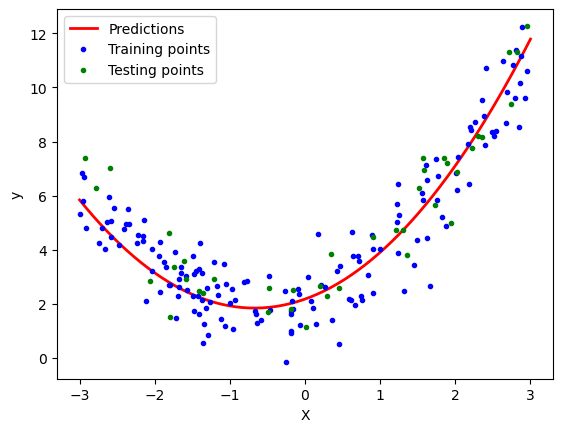

In [98]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# In linear data, plt.plot(X_train, predictions) connects the X's in the order they appear. Since X_train is generally sorted or nearly sorted → the line looks continuous and smooth
# In non-linear data, You’re trying to plot something like:

# plt.plot( [ [1, x1, x1²], [1, x2, x2²], ... ] , predictions )
# Matplotlib doesn’t know how to "order"/"plot" multidimensional data properly in 2D.

# This is why the plot looks scattered/weird

In [38]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()


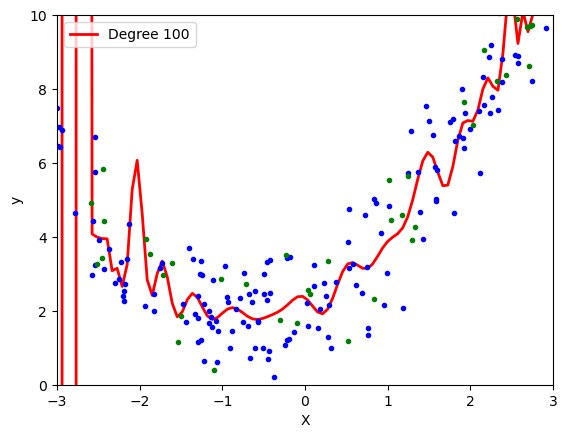

In [ ]:
polynomial_regression(100)
# degree = 100. So overfitting!

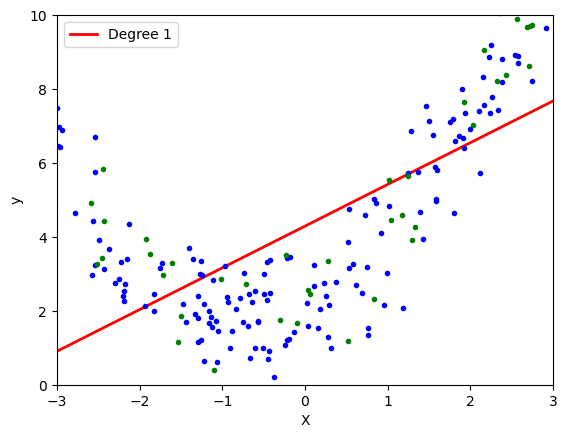

In [43]:
polynomial_regression(1)
# underfitting

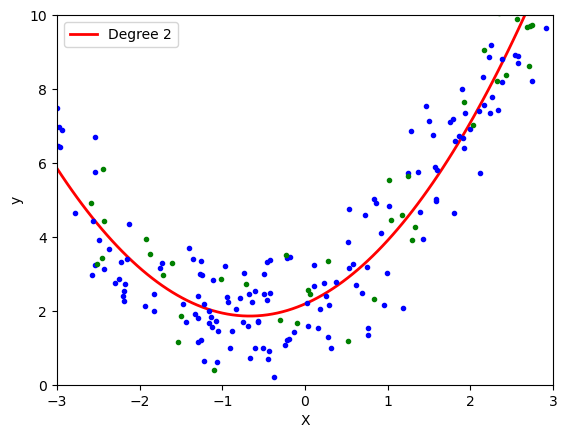

In [48]:
polynomial_regression(2)
# optimum degree

In [49]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

In [50]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [51]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [54]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [55]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [63]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [104]:
# print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 3
Powers
 [[0]
 [1]
 [2]]


In [58]:
X_multi_trans.shape

(100, 6)

In [59]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [60]:
X_test_multi = poly.transform(final)

In [61]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [62]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()
